In [1]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [2]:
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
df.shape

(183978, 42)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [6]:
df['overall_rating'].unique()

array([67., 62., 61., 74., 73., 71., 70., 69., 68., 65., 64., 54., 51.,
       52., 47., 53., 66., 59., 75., 72., 76., 78., 77., 79., 60., 80.,
       81., 82., 84., 48., 63., 83., 55., 58., 50., 56., nan, 49., 57.,
       42., 46., 45., 85., 44., 86., 89., 87., 88., 91., 40., 90., 41.,
       43., 38., 93., 92., 39., 33., 36., 37., 35., 94.])

In [7]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [8]:
df['player_fifa_api_id'].unique()

array([218353, 189615, 186170, ..., 111191,  47058, 102359], dtype=int64)

In [9]:
df.drop(['id','player_fifa_api_id','player_api_id','date'],axis=1,inplace=True)

In [10]:
df.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   overall_rating       183142 non-null  float64
 1   potential            183142 non-null  float64
 2   preferred_foot       183142 non-null  object 
 3   attacking_work_rate  180748 non-null  object 
 4   defensive_work_rate  183142 non-null  object 
 5   crossing             183142 non-null  float64
 6   finishing            183142 non-null  float64
 7   heading_accuracy     183142 non-null  float64
 8   short_passing        183142 non-null  float64
 9   volleys              181265 non-null  float64
 10  dribbling            183142 non-null  float64
 11  curve                181265 non-null  float64
 12  free_kick_accuracy   183142 non-null  float64
 13  long_passing         183142 non-null  float64
 14  ball_control         183142 non-null  float64
 15  acceleration     

In [12]:
df['preferred_foot'].unique()

array(['right', 'left', None], dtype=object)

In [13]:
df['preferred_foot'].value_counts()

right    138409
left      44733
Name: preferred_foot, dtype: int64

In [14]:
df['preferred_foot'].isnull().sum()

836

In [15]:
df['preferred_foot'].fillna('left',inplace=True)

In [16]:
df['preferred_foot'].isnull().sum()

0

In [17]:
df['preferred_foot'].value_counts()

right    138409
left      45569
Name: preferred_foot, dtype: int64

In [18]:
df['preferred_foot']=df['preferred_foot'].map({'right':1,'left':0}).astype(int)

In [19]:
df['preferred_foot'].value_counts()

1    138409
0     45569
Name: preferred_foot, dtype: int64

In [20]:
df['attacking_work_rate'].unique()

array(['medium', 'high', None, 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

In [21]:
df['attacking_work_rate'].isnull().sum()

3230

In [22]:
df['attacking_work_rate'].describe(include='all')

count     180748
unique         8
top       medium
freq      125070
Name: attacking_work_rate, dtype: object

In [23]:
df['attacking_work_rate'].value_counts()

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64

In [24]:
df['attacking_work_rate'].fillna('None',inplace=True)

In [25]:
df['attacking_work_rate'].value_counts()

medium    125070
high       42823
low         8569
None        6869
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64

In [26]:
df['attacking_work_rate'] = df['attacking_work_rate'].map({'medium':0,'high':1,'low':2,'None':3,'norm':4,'y':5,'le':6,'stoc':7}).astype(int)

In [27]:
df['attacking_work_rate'].value_counts()

0    125070
1     42823
2      8569
3      6869
4       348
5       106
6       104
7        89
Name: attacking_work_rate, dtype: int64

In [28]:
df['defensive_work_rate'].unique()

array(['medium', 'high', 'low', '_0', None, '5', 'ean', 'o', '1', 'ormal',
       '7', '2', '8', '4', 'tocky', '0', '3', '6', '9', 'es'],
      dtype=object)

In [29]:
df['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
0            197
6            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64

In [30]:
df['defensive_work_rate'].isnull().sum()

836

In [31]:
df['defensive_work_rate'].fillna('low',inplace=True)

In [32]:
df['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        19268
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
0            197
6            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64

In [33]:
df['defensive_work_rate'] = df['defensive_work_rate'].map({'medium':0,'high':1,'low':2,'_0':3,'o':4,'1':5,'ormal':6,'2':7,
                                                          '3':8,'5':9,'7':10,'6':11,'0':12,'9':13,'4':14,'es':15,'ean':16,
                                                          'tocky':17,'8':18}).astype(int)

In [34]:
df['defensive_work_rate'].value_counts()

0     130846
1      27041
2      19268
3       2394
4       1550
5        441
6        348
7        342
8        258
9        234
10       217
11       197
12       197
13       152
14       116
15       106
16       104
17        89
18        78
Name: defensive_work_rate, dtype: int64

In [35]:
df.describe()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183142.000000,183142.000000,183978.000000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,68.600015,73.460353,0.752313,0.455147,0.577721,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,7.041139,6.592271,0.431670,0.797908,1.453399,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,33.000000,39.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,64.000000,69.000000,1.000000,0.000000,0.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,69.000000,74.000000,1.000000,0.000000,0.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,73.000000,78.000000,1.000000,1.000000,1.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,94.000000,97.000000,1.000000,7.000000,18.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [36]:
df['overall_rating'].isnull().sum()

836

In [37]:
df['overall_rating'].fillna(df['overall_rating'].mean(),inplace=True)

In [38]:
df['overall_rating'].isnull().sum()

0

In [39]:
df['potential'].fillna(df['potential'].mean(),inplace=True)

In [40]:
df['potential'].isnull().sum()

0

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   overall_rating       183978 non-null  float64
 1   potential            183978 non-null  float64
 2   preferred_foot       183978 non-null  int32  
 3   attacking_work_rate  183978 non-null  int32  
 4   defensive_work_rate  183978 non-null  int32  
 5   crossing             183142 non-null  float64
 6   finishing            183142 non-null  float64
 7   heading_accuracy     183142 non-null  float64
 8   short_passing        183142 non-null  float64
 9   volleys              181265 non-null  float64
 10  dribbling            183142 non-null  float64
 11  curve                181265 non-null  float64
 12  free_kick_accuracy   183142 non-null  float64
 13  long_passing         183142 non-null  float64
 14  ball_control         183142 non-null  float64
 15  acceleration     

In [42]:
df['crossing'].fillna(df['crossing'].mean(),inplace=True)


In [43]:
df['finishing'].fillna(df['finishing'].mean(),inplace=True)
df['heading_accuracy'].fillna(df['heading_accuracy'].mean(),inplace=True)
df['short_passing'].fillna(df['short_passing'].mean(),inplace=True)
df['volleys'].fillna(df['volleys'].mean(),inplace=True)
df['dribbling'].fillna(df['dribbling'].mean(),inplace=True)
df['curve'].fillna(df['curve'].mean(),inplace=True)
df['free_kick_accuracy'].fillna(df['free_kick_accuracy'].mean(),inplace=True)
df['long_passing'].fillna(df['long_passing'].mean(),inplace=True)
df['ball_control'].fillna(df['ball_control'].mean(),inplace=True)
df['volleys'].fillna(df['volleys'].mean(),inplace=True)
df['dribbling'].fillna(df['dribbling'].mean(),inplace=True)
df['curve'].fillna(df['curve'].mean(),inplace=True)
df['free_kick_accuracy'].fillna(df['free_kick_accuracy'].mean(),inplace=True)
df['long_passing'].fillna(df['long_passing'].mean(),inplace=True)
df['ball_control'].fillna(df['ball_control'].mean(),inplace=True)
df['acceleration'].fillna(df['acceleration'].mean(),inplace=True)
df['sprint_speed'].fillna(df['sprint_speed'].mean(),inplace=True)
df['agility'].fillna(df['agility'].mean(),inplace=True)
df['reactions'].fillna(df['reactions'].mean(),inplace=True)
df['balance'].fillna(df['balance'].mean(),inplace=True)
df['shot_power'].fillna(df['shot_power'].mean(),inplace=True)
df['jumping'].fillna(df['jumping'].mean(),inplace=True)
df['stamina'].fillna(df['stamina'].mean(),inplace=True)
df['strength'].fillna(df['strength'].mean(),inplace=True)
df['long_shots'].fillna(df['long_shots'].mean(),inplace=True)
df['aggression'].fillna(df['aggression'].mean(),inplace=True)
df['positioning'].fillna(df['positioning'].mean(),inplace=True)
df['vision'].fillna(df['vision'].mean(),inplace=True)
df['penalties'].fillna(df['penalties'].mean(),inplace=True)
df['marking'].fillna(df['marking'].mean(),inplace=True)
df['standing_tackle'].fillna(df['standing_tackle'].mean(),inplace=True)
df['sliding_tackle'].fillna(df['sliding_tackle'].mean(),inplace=True)
df['gk_diving'].fillna(df['gk_diving'].mean(),inplace=True)
df['gk_handling'].fillna(df['gk_handling'].mean(),inplace=True)
df['gk_kicking'].fillna(df['gk_kicking'].mean(),inplace=True)
df['gk_positioning'].fillna(df['gk_positioning'].mean(),inplace=True)
df['gk_reflexes'].fillna(df['gk_reflexes'].mean(),inplace=True)

In [44]:
df['interceptions'].fillna(df['interceptions'].mean(),inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   overall_rating       183978 non-null  float64
 1   potential            183978 non-null  float64
 2   preferred_foot       183978 non-null  int32  
 3   attacking_work_rate  183978 non-null  int32  
 4   defensive_work_rate  183978 non-null  int32  
 5   crossing             183978 non-null  float64
 6   finishing            183978 non-null  float64
 7   heading_accuracy     183978 non-null  float64
 8   short_passing        183978 non-null  float64
 9   volleys              183978 non-null  float64
 10  dribbling            183978 non-null  float64
 11  curve                183978 non-null  float64
 12  free_kick_accuracy   183978 non-null  float64
 13  long_passing         183978 non-null  float64
 14  ball_control         183978 non-null  float64
 15  acceleration     

In [46]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline



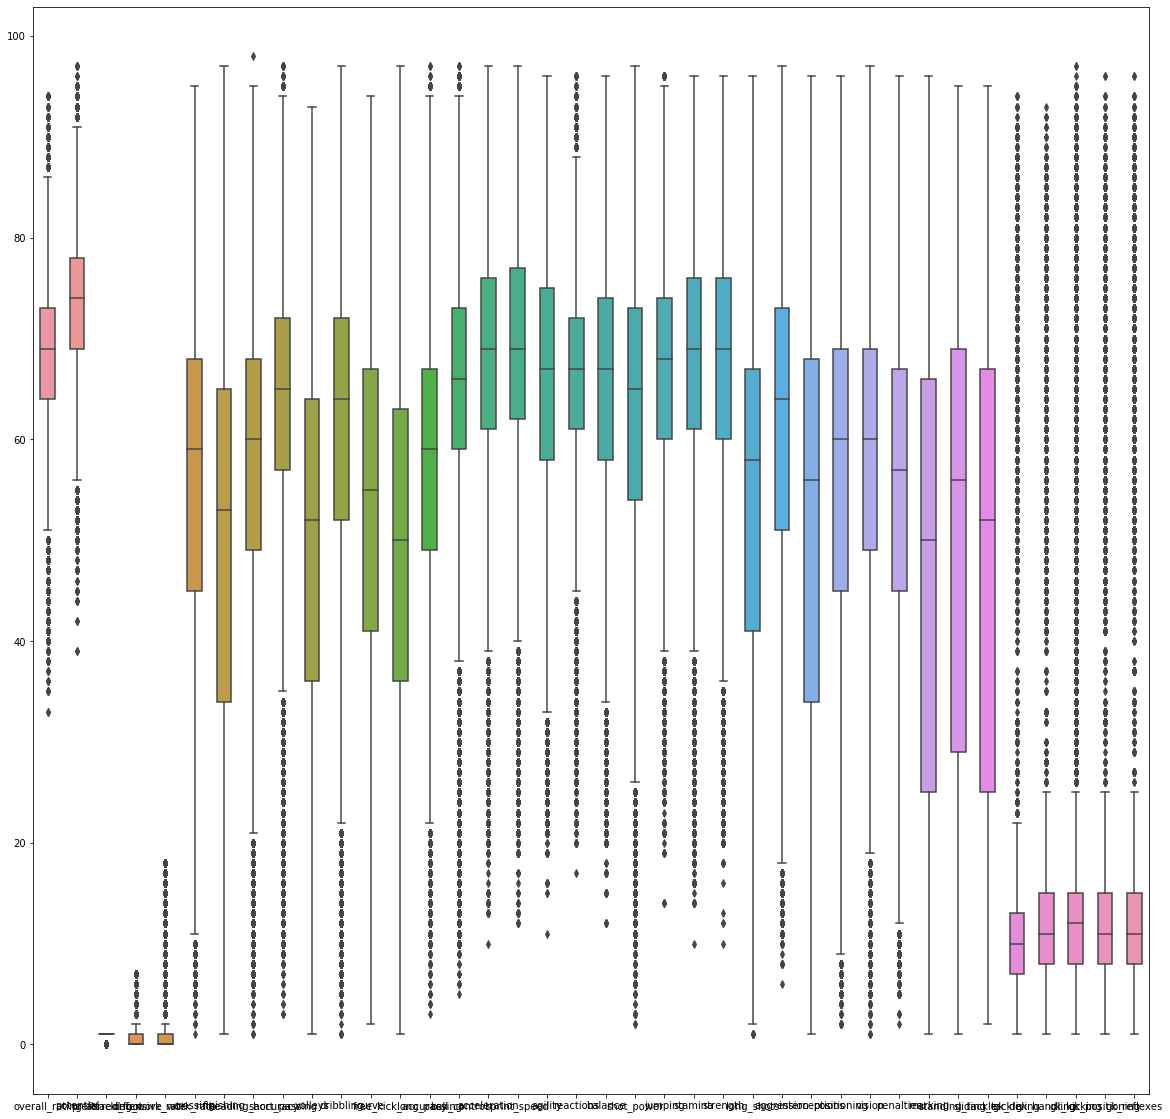

In [48]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=5)

In [49]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.22775679 0.37406974 0.57378948 ... 0.5138431  0.50628159 0.49195432]
 [0.22775679 0.37406974 0.57378948 ... 0.5138431  0.50628159 0.49195432]
 [0.93948997 1.13426495 0.57378948 ... 0.5138431  0.50628159 0.49195432]
 ...
 [1.19570957 0.99428164 0.57378948 ... 2.42951481 0.24079955 0.20738757]
 [1.3380562  1.14632068 0.57378948 ... 2.42951481 0.24079955 0.20738757]
 [1.62274948 1.14632068 0.57378948 ... 2.66311464 0.56853835 0.08400488]]


In [50]:
threshold = 3
print(np.where(z > 3))

(array([    35,    172,    172, ..., 183965, 183966, 183967], dtype=int64), array([ 0, 15, 16, ...,  3,  3,  3], dtype=int64))


In [51]:
df = df[(z < 3).all(axis=1)]

In [52]:
df.shape

(158045, 38)

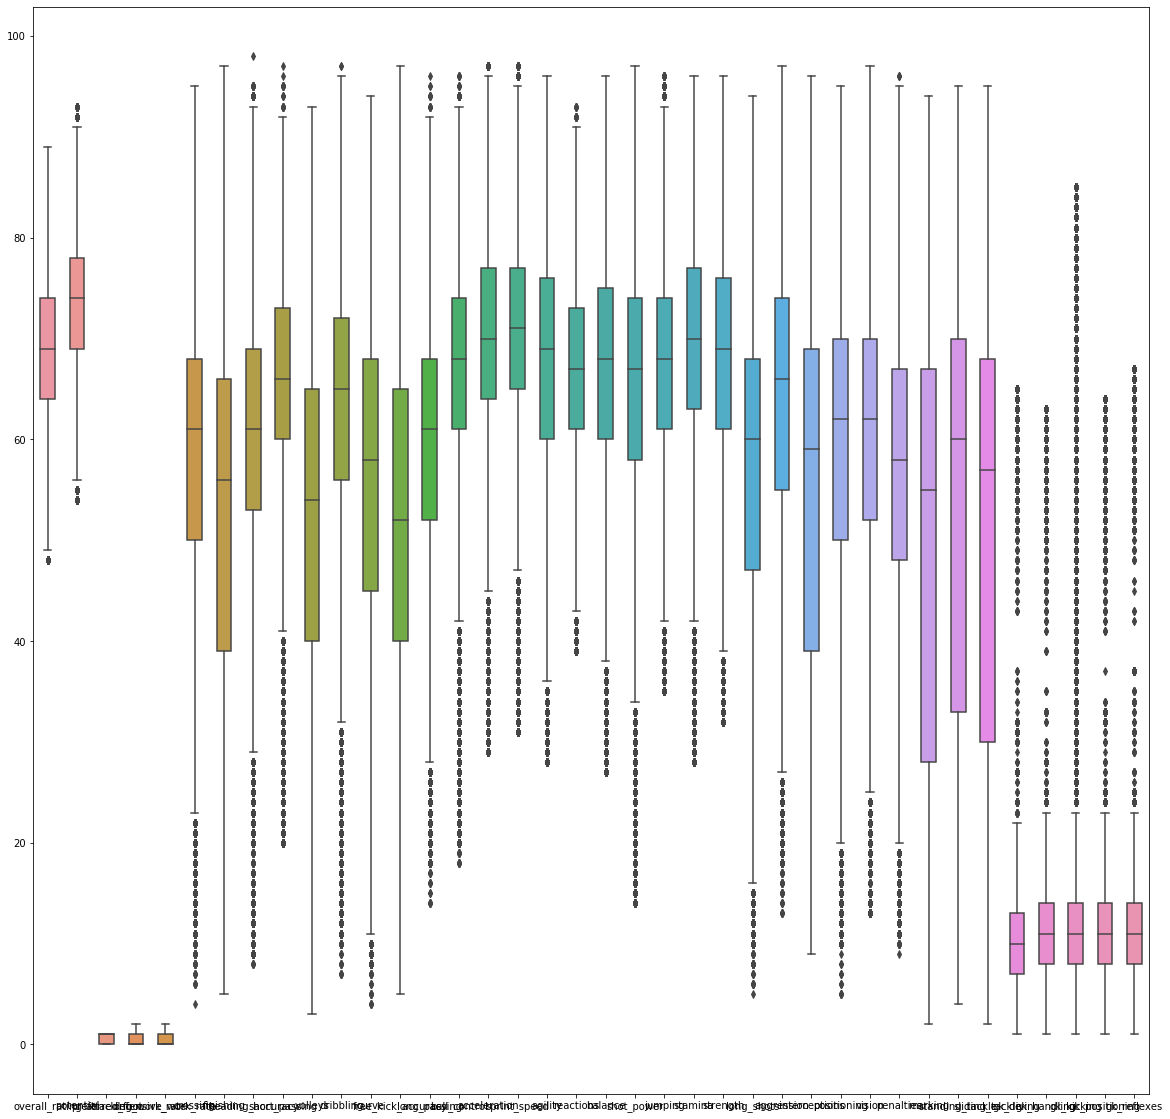

In [53]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=5)

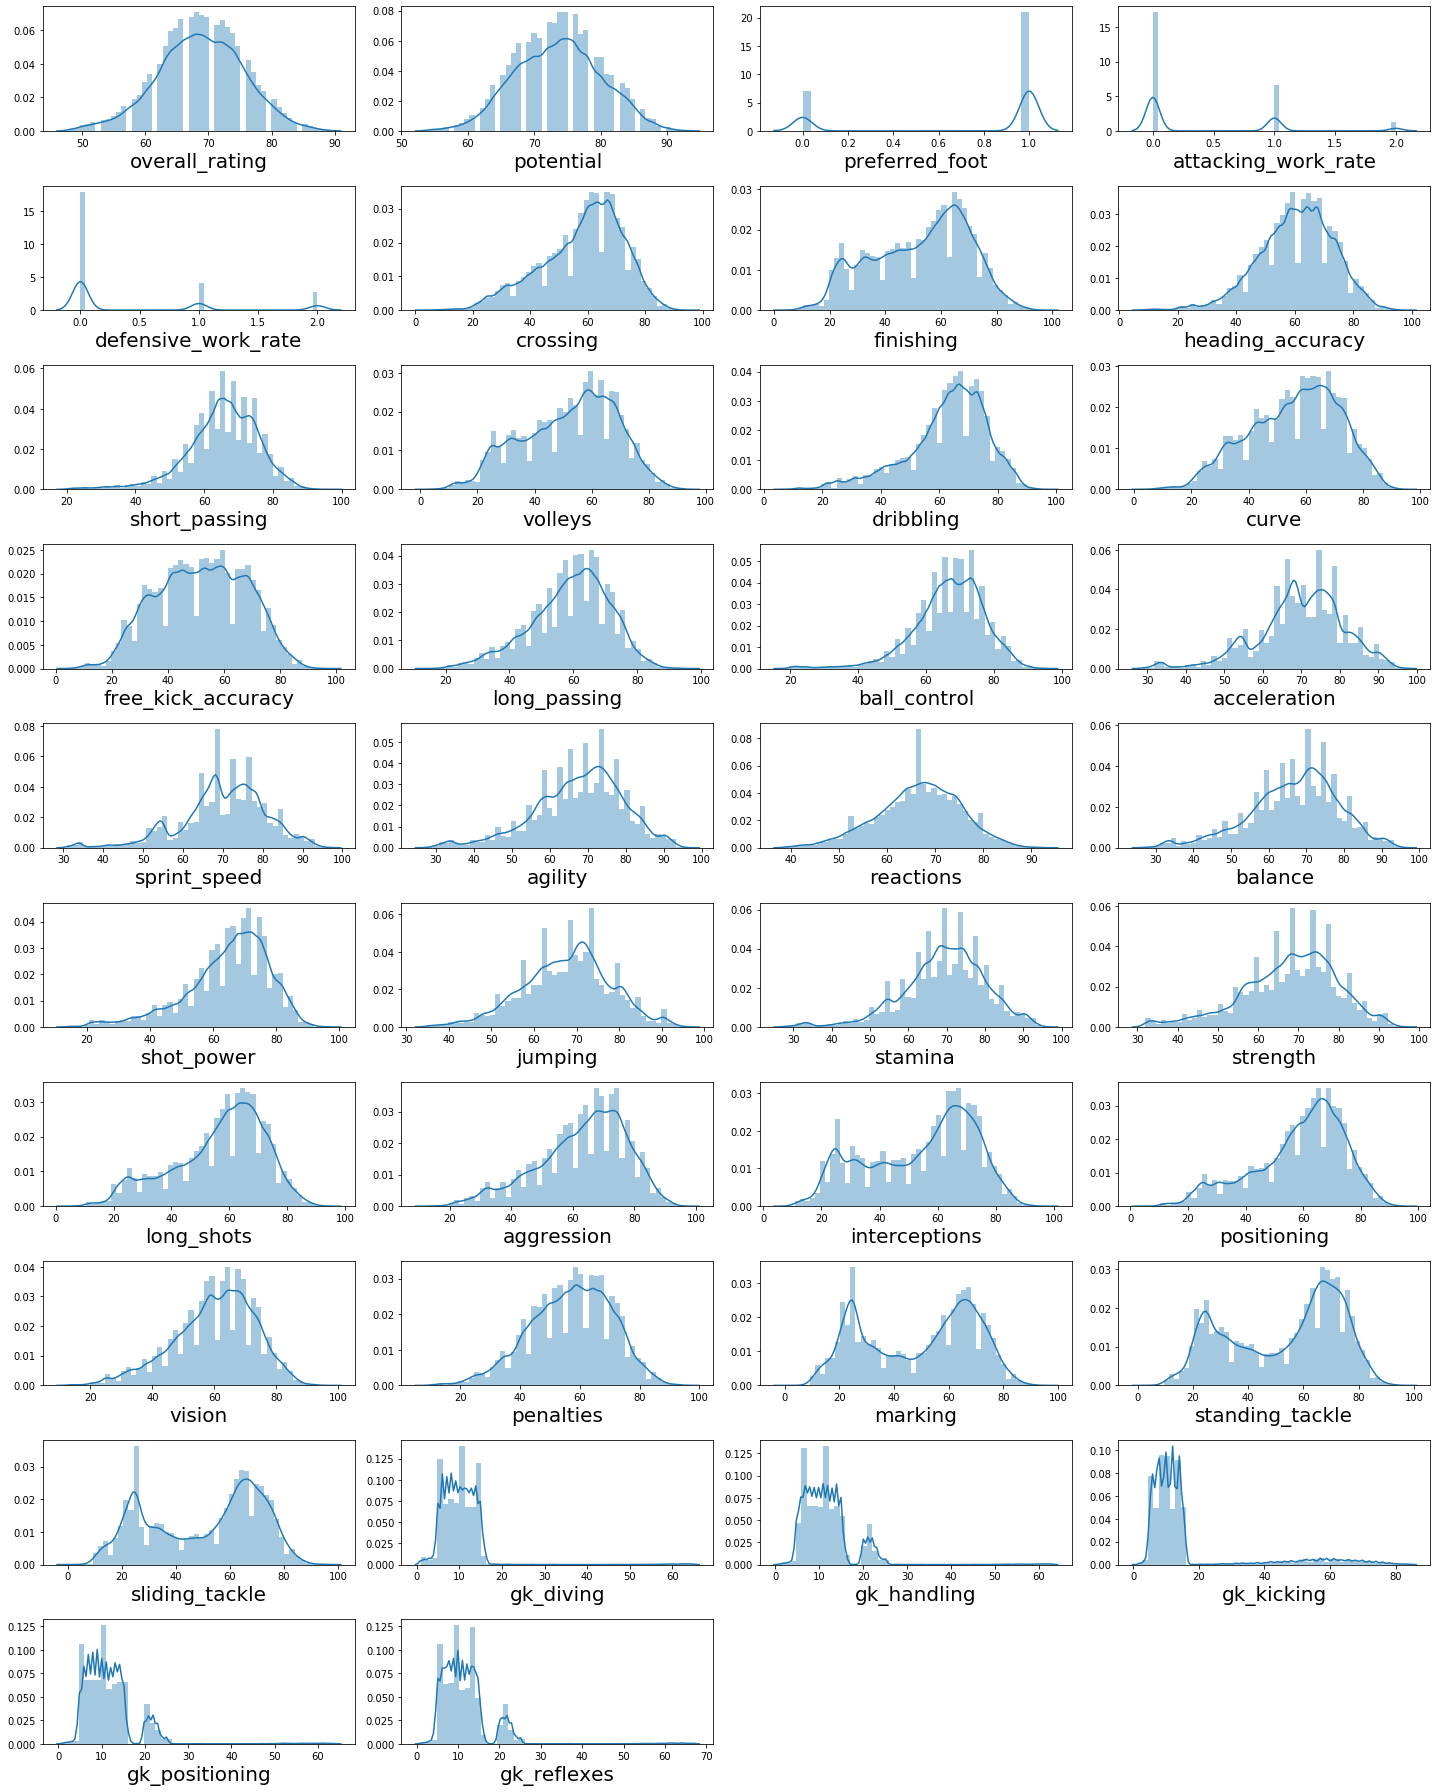

In [54]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=38 :
        ax = plt.subplot(10,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [55]:
q = df['gk_diving'].quantile(0.98)
df = df[df['gk_diving']<q]
q = df['gk_handling'].quantile(0.98)
df = df[df['gk_handling']<q]
q = df['gk_kicking'].quantile(0.96)
df = df[df['gk_kicking']<q]
q = df['gk_positioning'].quantile(0.98)
df = df[df['gk_positioning']<q]

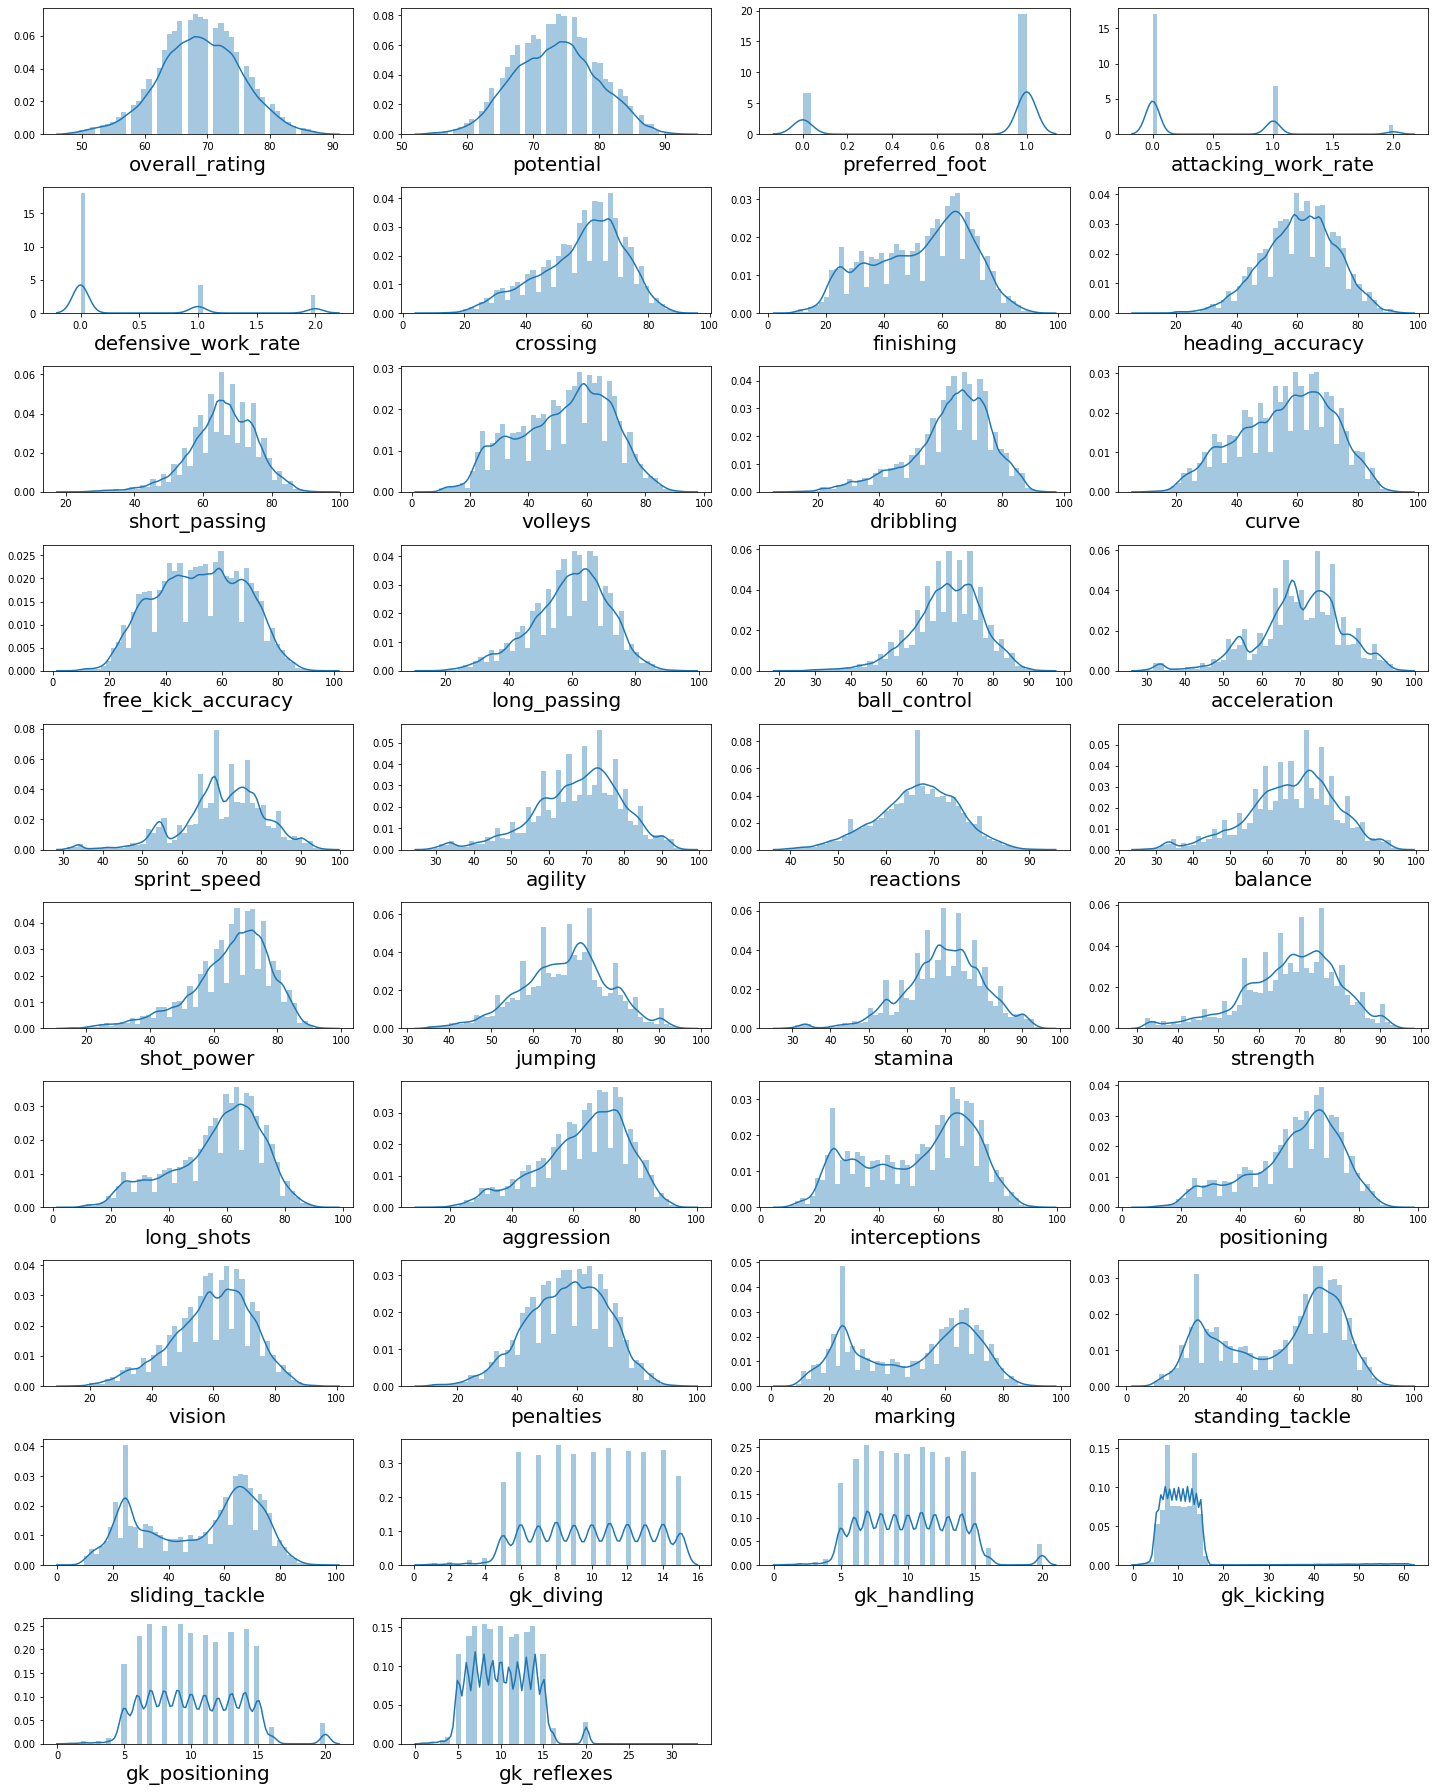

In [56]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=38 :
        ax = plt.subplot(10,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [57]:
y = df['overall_rating']
X = df.drop('overall_rating',axis=1)

In [58]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns


vif

,vif,Features
0,2.197796,potential
1,1.087879,preferred_foot
2,1.042905,attacking_work_rate
3,1.067946,defensive_work_rate
4,3.044289,crossing
5,5.954239,finishing
6,2.468609,heading_accuracy
7,5.534604,short_passing
8,4.055405,volleys
9,6.044701,dribbling


In [60]:
X.drop(['standing_tackle','sliding_tackle','marking','dribbling','ball_control','acceleration','interceptions'],axis=1,inplace=True)

In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137954 entries, 0 to 183972
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   potential            137954 non-null  float64
 1   preferred_foot       137954 non-null  int32  
 2   attacking_work_rate  137954 non-null  int32  
 3   defensive_work_rate  137954 non-null  int32  
 4   crossing             137954 non-null  float64
 5   finishing            137954 non-null  float64
 6   heading_accuracy     137954 non-null  float64
 7   short_passing        137954 non-null  float64
 8   volleys              137954 non-null  float64
 9   curve                137954 non-null  float64
 10  free_kick_accuracy   137954 non-null  float64
 11  long_passing         137954 non-null  float64
 12  sprint_speed         137954 non-null  float64
 13  agility              137954 non-null  float64
 14  reactions            137954 non-null  float64
 15  balance          

In [62]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.3,random_state=420)

# Using Linear Regression

In [64]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
regression.score(x_train,y_train)

0.8476142641883366

In [66]:
regression.score(x_test,y_test)

0.8493134992862374

In [67]:
y_pred = regression.predict(x_test)
y_pred

array([63.7897974 , 67.99672351, 70.41261794, ..., 69.4952651 ,
       57.0335127 , 65.42718901])

In [68]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
rms

2.5633859780122714

In [76]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8493134992862374

In [69]:
adj_r2(x_train,y_train)

0.8475669080509957

In [70]:
adj_r2(x_test,y_test)

0.849204189995653

In [71]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [72]:
elasticCV.alpha_

0.010576782091080213

In [73]:
elasticCV.l1_ratio

0.5

In [74]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.010576782091080213, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [75]:
elasticnet_reg.score(x_test, y_test)

0.8492237488266059